<a href="https://colab.research.google.com/github/Shiva-Chakravarthy-Gollapudi/info5502-spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [20]:
### You code here
!pip install pandas_datareader
!pip install yfinance
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("portfolio_data.csv")
data.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [21]:
#Checking for Null values
data.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


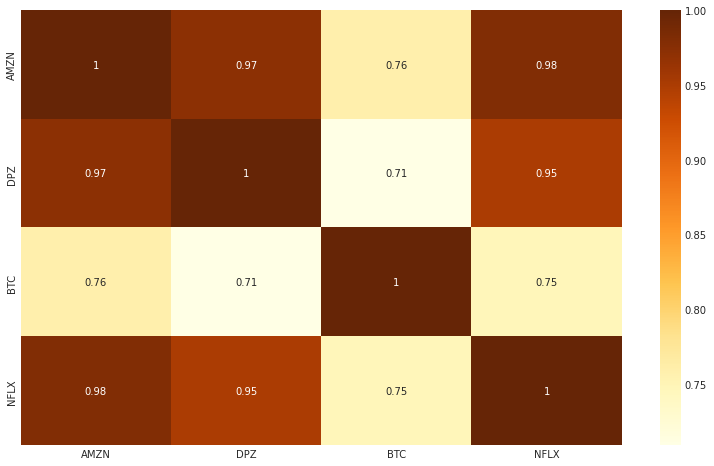

In [23]:
# finding corelation between the data
plt.subplots(figsize = (12,8))
sns.heatmap(data.corr(), cmap='YlOrBr', annot=True)
plt.show()

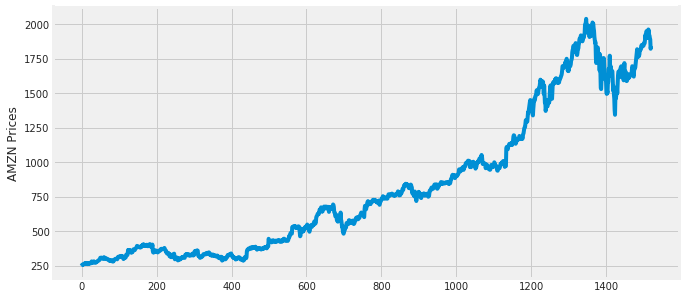

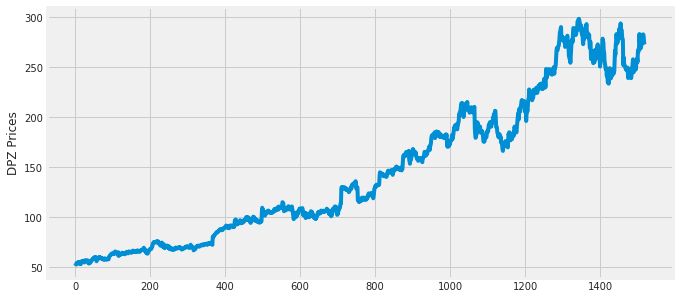

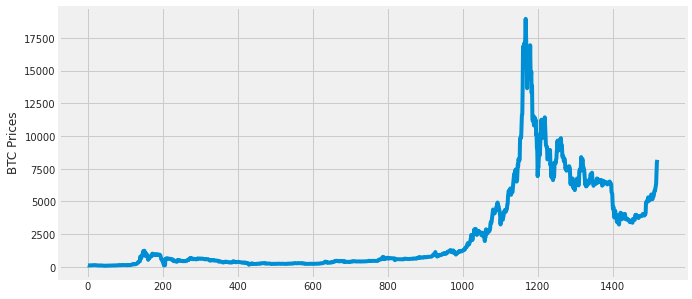

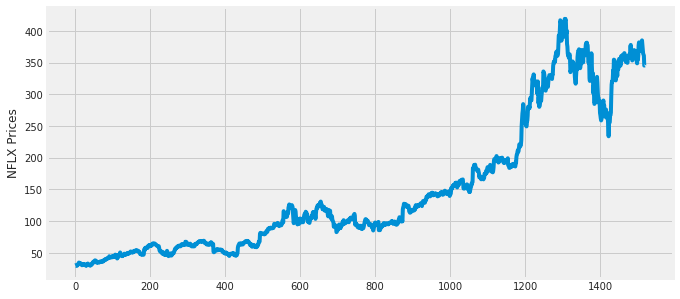

,AMZN
0,248.229996
1,252.550003
2,258.049988
3,255.720001
4,257.730011
...,...
1515,1917.770020
1516,1899.869995
1517,1889.979980
1518,1822.680054


In [24]:
Df_AMZN = df_stockdata[['AMZN']] 
Df_DPZ = df_stockdata[['DPZ']] 
Df_BTC = df_stockdata[['BTC']]
Df_NFLX = df_stockdata[['NFLX']] 



# Plot the closing price of GLD 
Df_AMZN.AMZN.plot(figsize=(10,5))
plt.ylabel("AMZN Prices")
plt.show()
Df_DPZ.DPZ.plot(figsize=(10,5))
plt.ylabel("DPZ Prices")
plt.show()
Df_BTC.BTC.plot(figsize=(10,5))
plt.ylabel("BTC Prices")
plt.show()
Df_NFLX.NFLX.plot(figsize=(10,5)) 
plt.ylabel("NFLX Prices")
plt.show()

Df_AMZN

In [25]:
Df_AMZN['S_3'] = Df_AMZN['AMZN'].shift(1).rolling(window=3).mean() 
Df_AMZN['S_9']= Df_AMZN['AMZN'].shift(1).rolling(window=9).mean() 
Df_DPZ['S_3'] = Df_DPZ['DPZ'].shift(1).rolling(window=3).mean() 
Df_DPZ['S_9']= Df_DPZ['DPZ'].shift(1).rolling(window=9).mean() 
Df_BTC['S_3'] = Df_BTC['BTC'].shift(1).rolling(window=3).mean() 
Df_BTC['S_9']= Df_BTC['BTC'].shift(1).rolling(window=9).mean() 
Df_NFLX['S_3'] = Df_NFLX['NFLX'].shift(1).rolling(window=3).mean() 
Df_NFLX['S_9']= Df_NFLX['NFLX'].shift(1).rolling(window=9).mean() 

Df_AMZN= Df_AMZN.dropna()
Df_DPZ= Df_DPZ.dropna()
Df_BTC= Df_BTC.dropna()
Df_NFLX= Df_NFLX.dropna()

In [27]:
Df_AMZN.head()

,AMZN,S_3,S_9
9,268.329987,262.766673,257.695557
10,266.559998,265.490001,259.928889
11,264.119995,266.466665,261.485555
12,269.899994,266.336660,262.160000
13,267.630005,266.859996,263.735555


In [28]:
Df_DPZ.head()

,DPZ,S_3,S_9
9,55.275757,54.317019,53.368693
10,54.001606,54.735491,53.822557
11,53.364532,54.616820,54.046366
12,53.936020,54.213965,54.148382
13,53.139683,53.767386,54.229578


In [29]:
Df_BTC.head()

,BTC,S_3,S_9
9,114.220001,114.913333,110.843333
10,118.209999,113.753334,111.728889
11,123.500000,114.610001,113.963333
12,123.209999,118.643333,115.141111
13,122.889999,121.639999,116.653333


In [30]:
Df_NFLX.head()

,NFLX,S_3,S_9
9,33.424286,31.594285,30.633016
10,34.771427,32.430476,30.967301
11,33.861427,33.654761,31.426190
12,34.142857,34.019047,31.800476
13,34.221428,34.258570,32.249841


In [31]:
X_AMZN = Df_AMZN[['S_3','S_9']] 
X_DPZ = Df_DPZ[['S_3','S_9']] 
X_BTC = Df_BTC[['S_3','S_9']] 
X_NFLX = Df_NFLX[['S_3','S_9']] 

Df_AMZN.head()

,AMZN,S_3,S_9
9,268.329987,262.766673,257.695557
10,266.559998,265.490001,259.928889
11,264.119995,266.466665,261.485555
12,269.899994,266.336660,262.160000
13,267.630005,266.859996,263.735555


In [32]:
y_AMZN = Df_AMZN['AMZN']
y_DPZ = Df_DPZ['DPZ']
y_BTC = Df_BTC['BTC']
y_NFLX = Df_NFLX['NFLX']

In [33]:
t=.8 
t = int(t*len(Df_AMZN)) 
# Train dataset 
X_train_AMZN = X_AMZN[:t] 
y_train_AMZN = y_AMZN[:t]  
# Test dataset 
X_test_AMZN = X_AMZN[t:] 
y_test_AMZN = y_AMZN[t:]

X_train_DPZ = X_DPZ[:t] 
y_train_DPZ = y_DPZ[:t]  
# Test dataset 
X_test_DPZ = X_DPZ[t:] 
y_test_DPZ = y_DPZ[t:]

X_train_BTC = X_BTC[:t] 
y_train_BTC = y_BTC[:t]  
# Test dataset 
X_test_BTC = X_BTC[t:] 
y_test_BTC = y_BTC[t:]

X_train_NFLX = X_NFLX[:t] 
y_train_NFLX = y_NFLX[:t]  
# Test dataset 
X_test_NFLX = X_NFLX[t:] 
y_test_NFLX = y_NFLX[t:]

In [ ]:
# Finding mean square error, R2_Score and Root mean square error.

MSE for the test set: 461.38
R2_Score for the test set: 0.96
RMSE for the test set: 21.48


In [17]:
from sklearn.linear_model import LinearRegression
linear_AMZN = LinearRegression().fit(X_train_AMZN,y_train_AMZN)
linear_DPZ = LinearRegression().fit(X_train_DPZ,y_train_DPZ)
linear_BTC = LinearRegression().fit(X_train_BTC,y_train_BTC)
linear_NFLX = LinearRegression().fit(X_train_NFLX,y_train_NFLX)

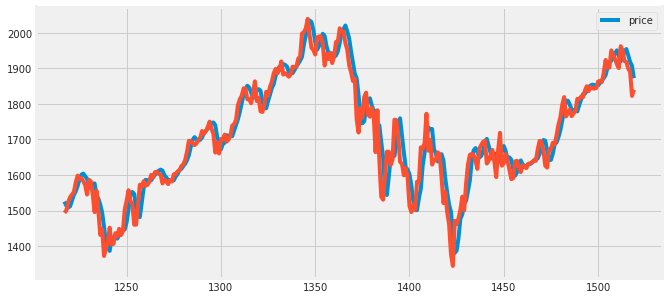

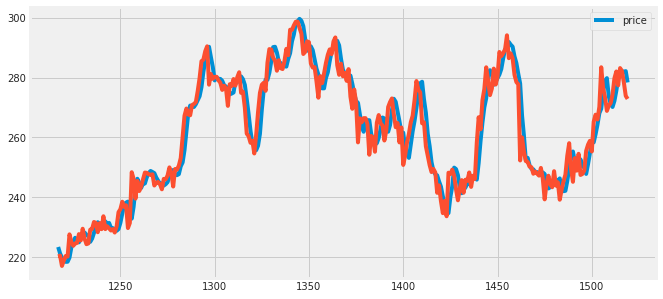

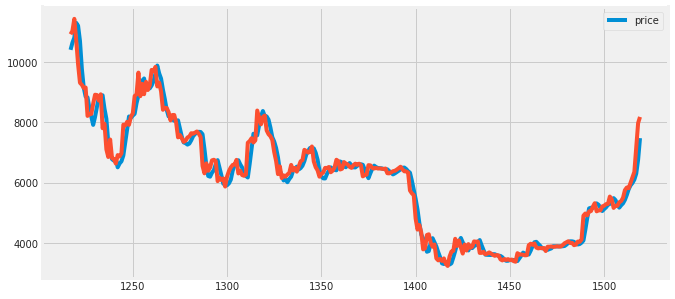

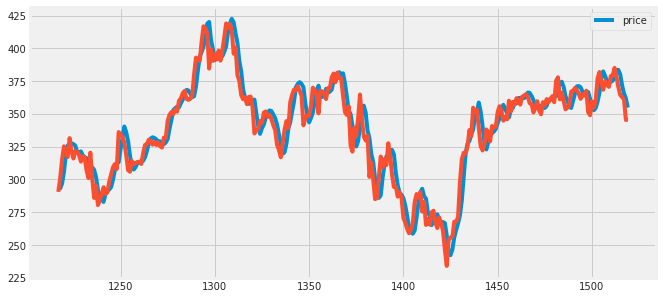

In [34]:
predicted_price_AMZN = linear_AMZN.predict(X_test_AMZN)
predicted_price_DPZ = linear_DPZ.predict(X_test_DPZ)
predicted_price_BTC = linear_BTC.predict(X_test_BTC)  
predicted_price_NFLX = linear_NFLX.predict(X_test_NFLX)

predicted_price_AMZN = pd.DataFrame(predicted_price_AMZN,index=y_test_AMZN.index,columns = ['price'])
predicted_price_AMZN.plot(figsize=(10,5)) 
y_test_AMZN.plot()  
 
plt.show()
predicted_price_AMZN

predicted_price_DPZ = pd.DataFrame(predicted_price_DPZ,index=y_test_DPZ.index,columns = ['price']) 
predicted_price_DPZ.plot(figsize=(10,5)) 
y_test_DPZ.plot()  
 
plt.show()
predicted_price_BTC = pd.DataFrame(predicted_price_BTC,index=y_test_BTC.index,columns = ['price']) 
predicted_price_BTC.plot(figsize=(10,5)) 
y_test_BTC.plot()  

plt.show()
predicted_price_NFLX = pd.DataFrame(predicted_price_NFLX,index=y_test_NFLX.index,columns = ['price']) 
predicted_price_NFLX.plot(figsize=(10,5)) 
y_test_NFLX.plot()  

plt.show()

In [35]:
# For amazon
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test_AMZN, predicted_price_AMZN)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test_AMZN, predicted_price_AMZN)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE)) 

MSE for the test set: 1829.53
R2_Score for the test set: 0.92
RMSE for the test set: 42.77


In [36]:
# For DPZ
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test_DPZ, predicted_price_DPZ)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test_DPZ, predicted_price_DPZ)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE)) 

MSE for the test set: 28.68
R2_Score for the test set: 0.93
RMSE for the test set: 5.36


In [37]:
# For BTC
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test_BTC, predicted_price_BTC)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test_BTC, predicted_price_BTC)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE)) 

MSE for the test set: 113386.10
R2_Score for the test set: 0.97
RMSE for the test set: 336.73


In [38]:
# For NFLX
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test_NFLX, predicted_price_NFLX)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test_NFLX, predicted_price_NFLX)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE)) 

MSE for the test set: 120.40
R2_Score for the test set: 0.91
RMSE for the test set: 10.97


### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
!unzip /content/test.csv.zip
!unzip /content/train.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
train  = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
#Combine test and train to filter the data
full_data = train.append(test, ignore_index=True)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [ ]:
# removing special characters and twitter handles
full_data['Comp_tweet'] = np.vectorize(remove_pattern)(full_data['tweet'], "@[\w]*")

# remove special characters, numbers, punctuations
full_data['Comp_tweet'] = full_data['Comp_tweet'].str.replace("[^a-zA-Z#]", " ")

# remove short word
full_data['Comp_tweet'] = full_data['Comp_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
full_data.head()

,id,label,tweet,Comp_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
# Tokenization and stemming 
tokenized_tweet = full_data['Comp_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Comp_tweet, dtype: object

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


In [ ]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(full_data['Comp_tweet'][full_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(full_data['Comp_tweet'][full_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

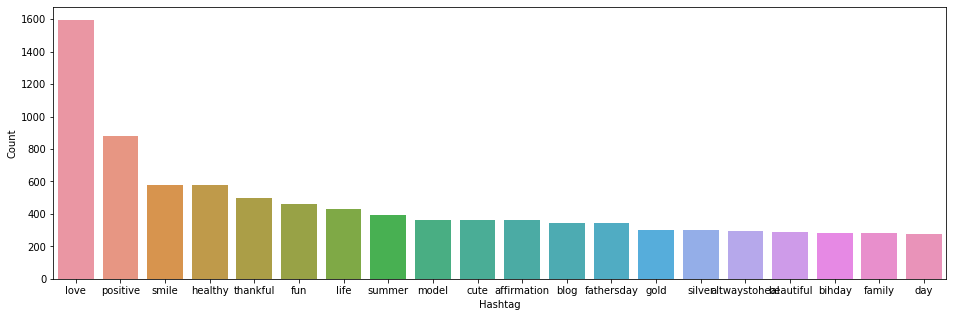

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

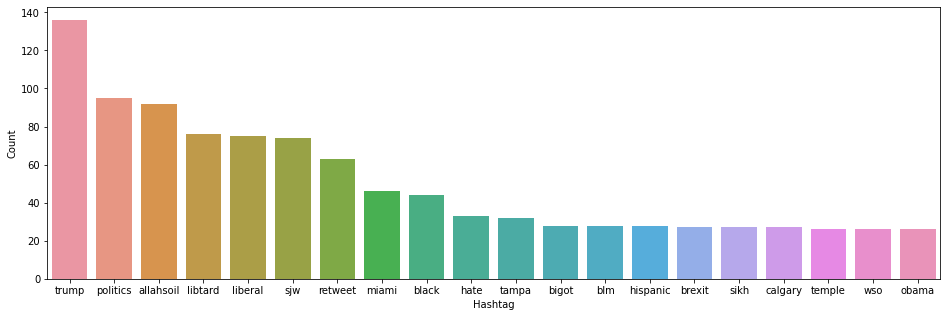

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(full_data['Comp_tweet'])
bow.shape

(49159, 1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [ ]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

# evaluating the model
print("Classification Report")
print(classification_report(yvalid, prediction_int))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.62      0.42      0.50       684

    accuracy                           0.94      9589
   macro avg       0.79      0.70      0.74      9589
weighted avg       0.93      0.94      0.93      9589

